<a href="https://colab.research.google.com/github/umair594/100-Prediction-Models-/blob/main/Decision_Tree_(Regression)_%E2%80%93_Tree_based_prediction_for_continuous_values__11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 11 — Decision Tree Regression**

**Project Overview**

This notebook demonstrates Decision Tree Regression for predicting continuous values using a tree-based machine learning approach.

**Goals:**

Understand tree-based regression

Train a Decision Tree Regressor

Evaluate performance

Visualize predictions and tree structure

# **1. Import Required Libraries**

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning from sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **2. Load Dataset**

In [ ]:
# We use the California Housing dataset (built into sklearn).

# Load dataset
housing = fetch_california_housing()

# Convert to DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data["Target"] = housing.target

# View data
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())


Dataset Shape: (20640, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499

# **4. Feature Selection**

In [ ]:
# Features and target
X = data.drop("Target", axis=1)
y = data["Target"]

# **5. Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# **6. Build Decision Tree Regression Model**

In [ ]:
model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

# **7. Make Predictions**

In [ ]:
y_pred = model.predict(X_test)

# **8. Model Evaluation**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.5245146178314735
R2 Score: 0.5997321244428706


**Expected:**

Lower MSE = better performance

R² closer to 1 = better fit

# **9. Visualization — Actual vs Predicted**

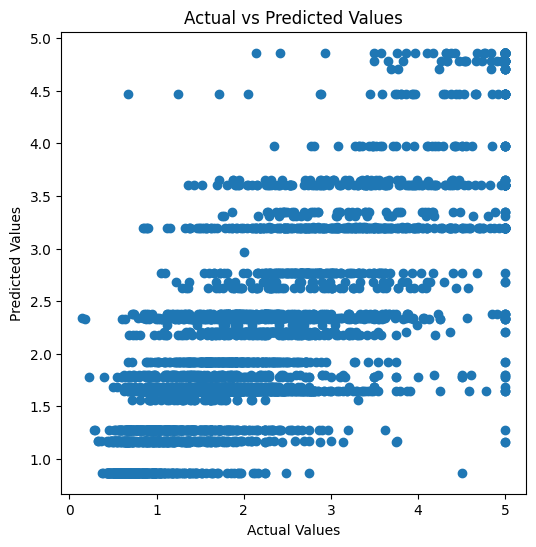

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# **10. Decision Tree Visualization**

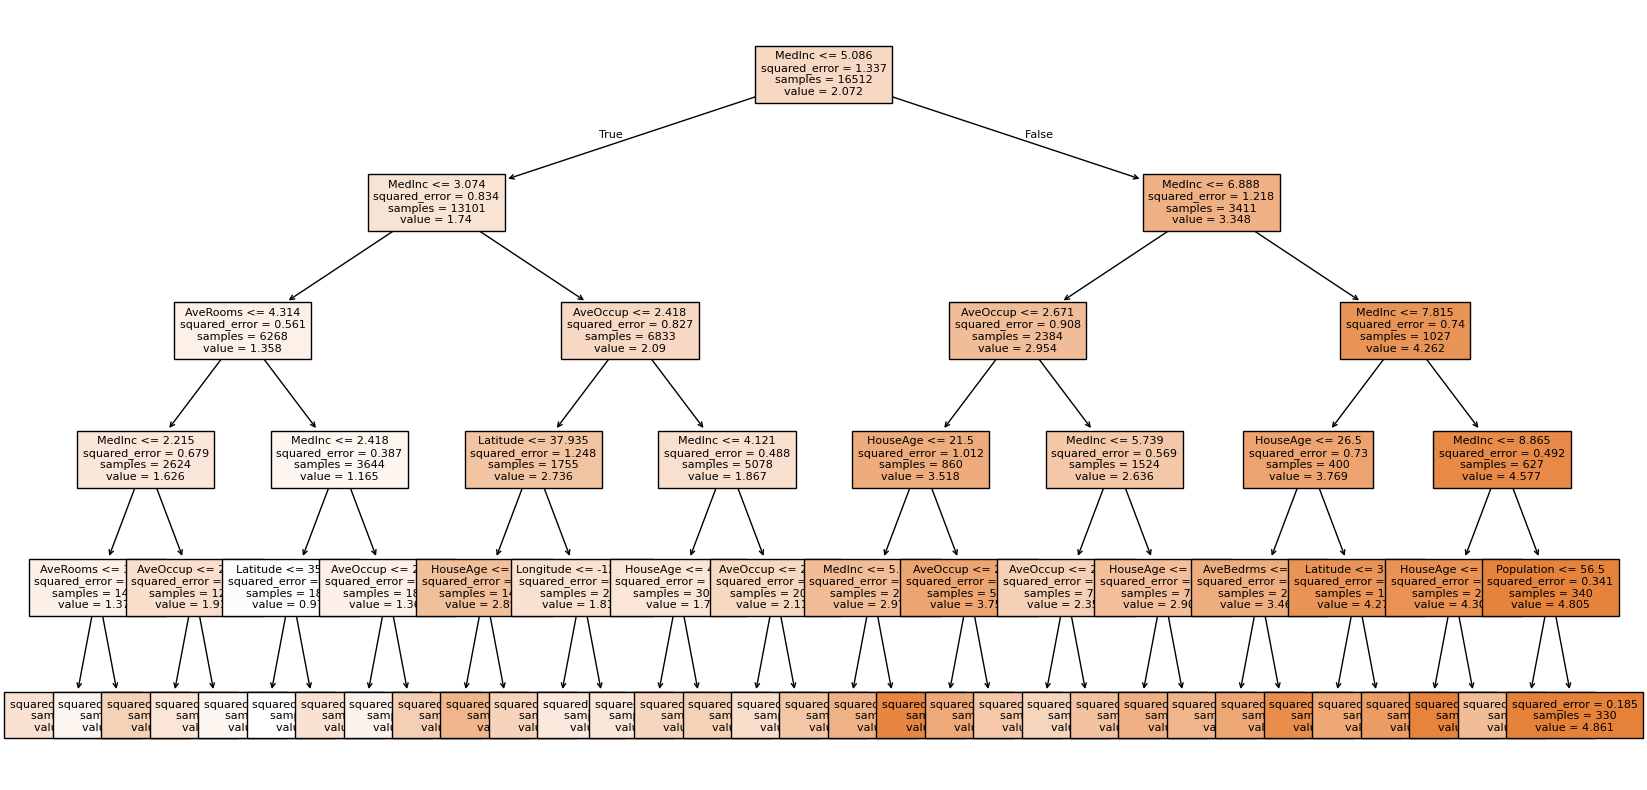

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    fontsize=8
)
plt.show()

# **11. Feature Importance**

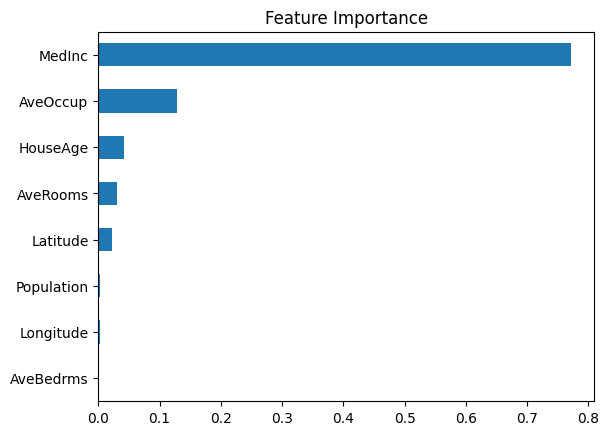

In [ ]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.show()

# **12. Understanding Decision Tree Regression**

**How it works:**

Select best feature split.

Divide data into smaller subsets.

Reduce variance in each node.

Repeat until stopping criteria met.

Prediction = average value in leaf node.

# **13. Conclusion**

**Decision Tree Regression:**

Captures nonlinear relationships.

Easy to interpret via tree visualization.

Requires tuning (e.g., max_depth) to avoid overfitting.

**Optional Improvements**

Hyperparameter tuning (GridSearchCV)

Cross-validation

Random Forest comparison

Gradient Boosting comparison